<a href="https://colab.research.google.com/github/Hartheek1704/house-price-prediction-ml/blob/main/second_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/Housing.csv")

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


Shape: (49, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             49 non-null     int64 
 1   area              49 non-null     int64 
 2   bedrooms          49 non-null     int64 
 3   bathrooms         49 non-null     int64 
 4   stories           49 non-null     int64 
 5   mainroad          49 non-null     object
 6   guestroom         49 non-null     object
 7   basement          49 non-null     object
 8   hotwaterheating   49 non-null     object
 9   airconditioning   49 non-null     object
 10  parking           49 non-null     int64 
 11  prefarea          49 non-null     object
 12  furnishingstatus  49 non-null     object
dtypes: int64(6), object(7)
memory usage: 5.1+ KB
None
              price          area   bedrooms  bathrooms    stories    parking
count  4.900000e+01     49.000000  49.000000  49.000000  4

In [4]:

df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-1431824206.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:

df["TotalRooms"] = df["bedrooms"] + df["bathrooms"]
df["Price_per_sqft"] = df["price"] / df["area"]


In [7]:
df = pd.get_dummies(df, drop_first=True)


In [9]:
X = df.drop("price", axis=1)
y = df["price"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )


In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [13]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [14]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [15]:
def evaluate(y_test, y_pred, name):
    print(f"----- {name} -----")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print()

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")


----- Linear Regression -----
MAE: 822220.7560055342
RMSE: 1078669.7919765362
R2 Score: -2.3620300052817504

----- Decision Tree -----
MAE: 445606.0
RMSE: 543609.9965600339
R2 Score: 0.14611492827247963

----- Random Forest -----
MAE: 447026.4399999998
RMSE: 588016.2018464523
R2 Score: 0.0009133932423791569



In [16]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))


                            Feature  Importance
0                              area    0.381933
6                    Price_per_sqft    0.345446
4                           parking    0.105115
3                           stories    0.040369
11                     prefarea_yes    0.037030
2                         bathrooms    0.035486
7                     guestroom_yes    0.012091
5                        TotalRooms    0.011666
12  furnishingstatus_semi-furnished    0.008366
1                          bedrooms    0.007151


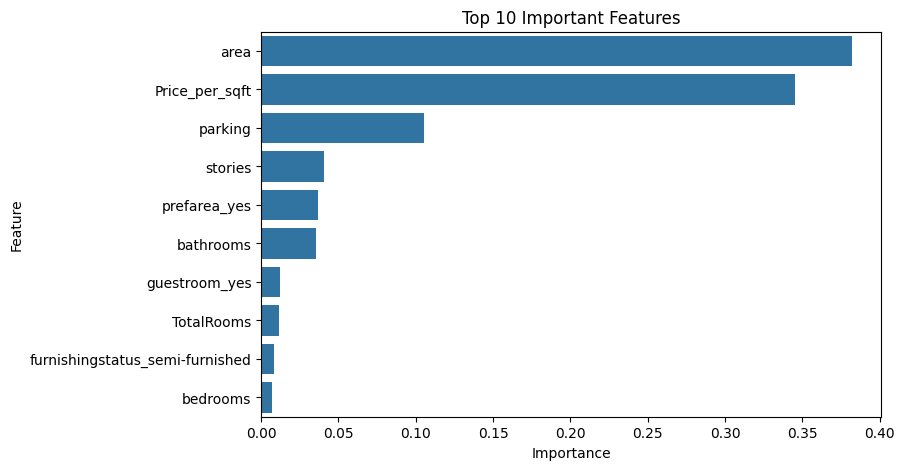

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [18]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross Validation R2 Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))


Cross Validation R2 Scores: [ -4.93107148  -3.21227194 -22.36694693 -20.0188776  -58.2149278 ]
Average CV Score: -21.74881915112912


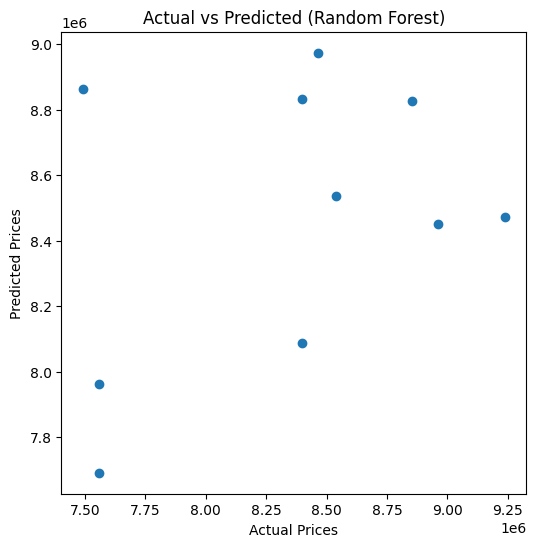

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()
